For Landsat 8, the band designations are as follows:

Band 2 (Blue): Wavelength range approximately 450-515 nm.

Band 3 (Green): Wavelength range approximately 530-590 nm.

Band 4 (Red): Wavelength range approximately 640-670 nm.

Band 5 (Near-Infrared/NIR): Wavelength range approximately 850-880 nm.

NDVI= ((NIR)-(Red)) /
((NIR)+(Red))
​


In [ ]:
!pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 67.9 MB/s eta 0:00:00


In [ ]:
!pip install rasterio numpy matplotlib


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


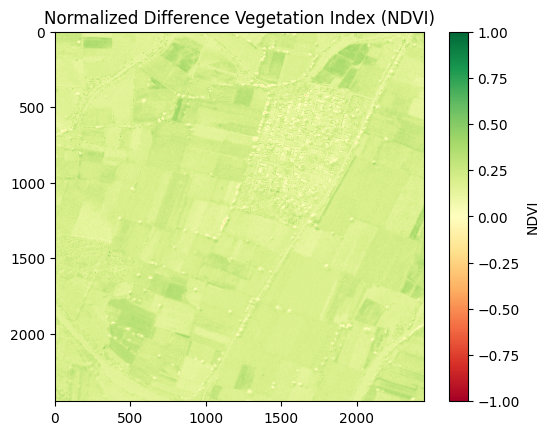

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/16453_sat.jpg'

with rasterio.open(image_path) as src:
    # Read the image bands (assuming NIR and Red bands are available, adjust if needed)
    nir_band = src.read(2).astype(float)  # band 2
    red_band = src.read(3).astype(float)  # band 3

    # Avoid division by zero by setting a small value for zero NIR reflectance
    epsilon = 1e-9
    ndvi = (nir_band - red_band) / (nir_band + red_band + epsilon)

# Plot the NDVI image
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI)')
plt.show()


# **WATER:**
This class typically represents areas covered by water bodies, such as rivers, lakes, ponds, oceans, and other bodies of water. In satellite imagery, water bodies often appear dark or blue, depending on the sensor and atmospheric conditions.

#**BUILD UP:**
The built-up class refers to areas with significant human-made structures and infrastructure, such as urban or suburban areas, residential and commercial buildings, roads, and other constructions. In satellite imagery, built-up areas often exhibit a mix of colors and textures.

#**BARREN LAND:**
Barren land class includes areas with little or no vegetation cover and limited soil productivity. This category may encompass deserts, rocky terrain, sand dunes, or other landscapes where vegetation is sparse. Barren land often appears with earthy tones or shades of brown and may lack distinct vegetation patterns.

#**Shrub and Grassland:**
Shrub and grassland class represents areas dominated by low-lying vegetation, including shrubs, grasses, and other herbaceous plants. This category is common in landscapes where trees are not the dominant vegetation, and the terrain is covered by grassy vegetation.

#**Sparse Vegetation:**
Sparse vegetation class includes areas with scattered or low-density vegetation cover. This may include regions with isolated trees, shrubs, or patches of vegetation amidst non-vegetated areas. Sparse vegetation can vary in density and composition.

#**Dense Vegetation:**
Dense vegetation class represents areas with a high density of vegetation cover, such as forests, jungles, or areas with thick vegetation canopies. In satellite imagery, dense vegetation often appears as dark green or can exhibit varying shades depending on the type and health of the vegetation.



1.   Water (−0.28 - 0.015)
2.   built-up (0.015 - 0.14)
3.   barren land(0.14–0.18)
4.   Shrub and Grassland(0.18–0.27)
5.   Sparse Vegetation(0.27–0.36)
6.   dense vegetation(0.36–0.74)





In [ ]:
from matplotlib.colors import ListedColormap

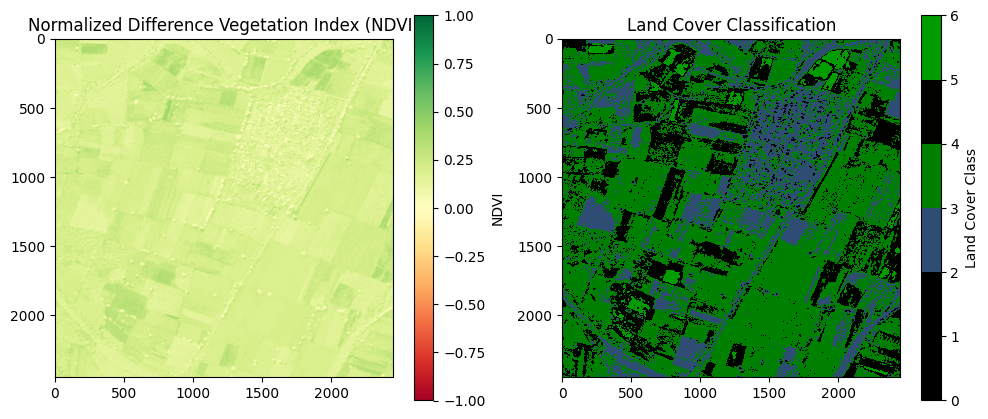

In [ ]:
ndvi_ranges = [
    -0.28, 0.015,   # Water
    0.015, 0.14,    # Built-up
    0.14, 0.18,     # Barren Land
    0.18, 0.27,     # Shrub and Grassland
    0.27, 0.36,     # Sparse Vegetation
    0.36, 0.74      # Dense Vegetation
]

# Define colors for each class
colors = [
    (0, 0, 255),   # Blue for Water
    (255, 0, 0),   # Red for Built-up
    (210, 180, 140),  # Tan for Barren Land
    (0, 128, 0),   # Green for Shrub and Grassland
    (255, 255, 0),  # Yellow for Sparse Vegetation
    (0, 100, 0)    # Dark Green for Dense Vegetation
]

# Function to classify NDVI values into land cover classes
def classify_ndvi(ndvi_value):
    if ndvi_value is None:
        return 0  # Return class 0 for undefined/unclassified pixels

    for i, (lower, upper) in enumerate(zip(ndvi_ranges[::2], ndvi_ranges[1::2])):
        if lower <= ndvi_value <= upper:
            return i + 1  # Return the index of the land cover class (starting from 1)

    return 0  # Default to class 0 if no range matches

# Apply the classification function to each pixel in the NDVI array
rows, cols = ndvi.shape
classified_image = np.zeros_like(ndvi, dtype=int)

for i in range(rows):
    for j in range(cols):
        classified_image[i, j] = classify_ndvi(ndvi[i, j])

# Create a colormap using ListedColormap
cmap = ListedColormap(colors, name='custom_colormap', N=len(colors))

# Plot the original NDVI image and the classified image with specified colors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI)')

plt.subplot(1, 2, 2)
plt.imshow(classified_image, cmap=cmap, vmin=0, vmax=len(ndvi_ranges)//2)
plt.colorbar(ticks=np.arange(0, len(ndvi_ranges)//2 + 1), label='Land Cover Class')
plt.title('Land Cover Classification')

plt.show()

# **Digital Surface Model(DSM):**
Represents the Earth's surface, including natural and man-made features.
Includes the heights of all objects on the surface, such as buildings and vegetation.
# **Digital Terrain Model(DTM):**
Represents the bare Earth's surface, excluding above-ground features.
Provides a more accurate representation of the actual terrain.

# **calculation of height**
Canopy Height Model (CHM) is calculated by subtracting DTM values from DSM values.
CHM represents the height of vegetation or objects above the bare Earth.


# LiDAR(Light Detection and Ranging):
It is a remote sensing technology that uses laser light to measure distances and create detailed, three-dimensional maps of the Earth's surface. It is commonly used for mapping terrain, surveying, autonomous vehicles, and various applications requiring highly accurate spatial information.

In the below code we used 50cm resolution models from LiDAR 3D survey in 2017

# The "chm_data" array contains the height values of the vegetation at each pixel. You can interpret these values as the vertical distance from the ground to the top of the vegetation canopy.For example, if a pixel in the CHM has a value of 10 meters, it means that the vegetation at that location reaches a height of 10 meters above the ground.